#8.2 텍스트 전처리

<문장 토큰화>

In [10]:
!pip install nltk

In [13]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt_tab')

text_sample='The Matrix is everyshere its all around us, here even in this room. \
              You can see it out your window or on your television. \
              You feel it when you go to work, or go to church or pay your taxes.'
sentences=sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everyshere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<단어 토큰화>

In [14]:
from nltk import word_tokenize

sentence='The Matrix is everywhere its all around us, here even in this room.'
words=word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


<문장 토큰화+단어 토큰화>: 모든 단어를 토큰화

In [16]:
from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
  #문장별로 분리 토큰
  sentences=sent_tokenize(text)
  #분리된 문장별 단어 토큰화
  word_tokens=[word_tokenize(sentence) for sentence in sentences]
  return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens=tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everyshere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


<스톱 워드 제거>

In [18]:
import nltk
nltk.download('stopwords')

print('영어 stop word개수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop word개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
import nltk

stopwords=nltk.corpus.stopwords.words('english')
all_tokens=[]
#위 예제엇 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    #소문자로 모두 변환
    word=word.lower()
    #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)
print(all_tokens)

[['matrix', 'everyshere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


< Stemming>

In [20]:
from nltk.stem import LancasterStemmer
stemmer=LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


< Lemmatization>

In [21]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma=WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


#8.3 BOW

<희소 행렬-COO형식>

In [23]:
import numpy as np

dense=np.array([[3,0,1],[0,2,0]])

In [26]:
from scipy import sparse

#0이 아닌 데이터 추출
data=np.array([3,1,2])

#행 위치와 열 위치를 각각 배열로 생성
row_pos=np.array([0,0,1])
col_pos=np.array([0,2,1])

#sparse 패키지의 coo_matrix를 이용해 COO형식으로 희소 행렬 생성
sparse_coo=sparse.coo_matrix((data,(row_pos,col_pos)))

In [27]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

다시 원래의 데이터 행렬로 추출

<희소 행렬-CSR 형식>

In [28]:
from scipy import sparse
dense2=np.array([[0,0,1,0,0,5],[1,4,0,3,2,5],[0,6,0,3,0,0],[2,0,0,0,0,0],[0,0,0,7,0,8],[1,0,0,0,0,0]])
#0이 아닌 데이터 추출
data2=np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])
#행 위치와 열 위치를 각각 array로 생성
row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])
#COO형식으로 변환
sparse_coo=sparse.coo_matrix((data2,(row_pos,col_pos)))
#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind=np.array([0,2,7,9,10,12,13])
#CSR 형식으로 변환
sparse_csr=sparse.csr_matrix((data2,col_pos,row_pos_ind))

print('COO변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


<실제 사용시>

In [29]:
dense3=np.array([[0,0,1,0,0,5],[1,4,0,3,2,5],[0,6,0,3,0,0],[2,0,0,0,0,0],[0,0,0,7,0,8],[1,0,0,0,0,0]])
coo=sparse.coo_matrix(dense3)
csr=sparse.csr_matrix(dense3)

#8.5 감성분석

<지도학습 기반 감성 분석 실습>

In [31]:
import pandas as pd

review_df=pd.read_csv('/content/labeledTrainData.tsv',header=0,sep='\t',quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [32]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [33]:
import re
#<br> html 태그는 replace함수로 공백으로 변환
review_df['review']=review_df['review'].str.replace('<br />',' ')

#파이썬의 정규 표현식 모듈은 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review']=review_df['review'].apply(lambda x : re.sub('[^a-zA-Z]',' ',x))

In [34]:
from sklearn.model_selection import train_test_split

class_df=review_df['sentiment']
feature_df=review_df.drop(['id','sentiment'],axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(feature_df,class_df,test_size=0.3,random_state=156)
X_train.shape,X_test.shape

((17500, 1), (7500, 1))

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

#stop word는 english, filtering, ngram은 (1,2)로 설정해 CountVectorization 수행
#LogisticRegression의 C는 10으로 설정
pipeline=Pipeline([('cnt_vect',CountVectorizer(stop_words='english',ngram_range=(1,2))),('lr_clf',LogisticRegression(C=10))])
#Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행
pipeline.fit(X_train['review'],y_train)
pred=pipeline.predict(X_test['review'])
pred_probs=pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test,pred),roc_auc_score(y_test,pred_probs)))

예측 정확도는 0.8848, ROC-AUC는 0.9509


In [38]:
#stop word는 english, filtering, ngram은 (1,2)로 설정해 Tf-IDF 벡터화 수행
#LogisticRegression의 C는 10으로 설정
pipeline=Pipeline([('tfidf_vect',TfidfVectorizer(stop_words='english',ngram_range=(1,2))),('lr_clf',LogisticRegression(C=10))])

pipeline.fit(X_train['review'],y_train)
pred=pipeline.predict(X_test['review'])
pred_probs=pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test,pred),roc_auc_score(y_test,pred_probs)))

예측 정확도는 0.8939, ROC-AUC는 0.9596


<비지도 학습 기반 감성 분석>

SentiWordNet을 이용한 감성 분석

In [39]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [40]:
from nltk.corpus import wordnet as wn

term='present'

#'present'라는 단어로 wordnet의 synsets 생성
synsets=wn.synsets(term)
print('synsets()반환type:',type(synsets))
print('synsets()반환 값 개수:',len(synsets))
print('synsets()반환 값:',synsets)

synsets()반환type: <class 'list'>
synsets()반환 값 개수: 18
synsets()반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [41]:
for synset in synsets:
  print('##### Synset name:',synset.name(),'#####')
  print('POS:',synset.lexname())
  print('Definition:',synset.definition())
  print('Lemmas:',synset.lemma_names())

##### Synset name: present.n.01 #####
POS: noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name: present.n.02 #####
POS: noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name: present.n.03 #####
POS: noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name: show.v.01 #####
POS: verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name: present.v.02 #####
POS: verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name: stage.v.01 #####
POS: verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represent']
##### Synset n

In [43]:
#synset객체를 단어별로 생성
tree=wn.synset('tree.n.01')
lion=wn.synset('lion.n.01')
tiger=wn.synset('tiger.n.02')
cat=wn.synset('cat.n.01')
dog=wn.synset('dog.n.01')

entities=[tree,lion,tiger,cat,dog]
similarities=[]
entity_names=[entity.name().split('.')[0] for entity in entities]

#단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정함
for entity in entities:
  similarity=[round(entity.path_similarity(compared_entity),2) for compared_entity in entities]
  similarities.append(similarity)

#개별 단어별 synset과 다른 단어의 synset과의 유사도르 DataFrame형태로 저장함
similarity_df=pd.DataFrame(similarities,columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


lion은 tree와의 유사도가 0.07로 가장 적고, tiger와의 유사도가 0.33으로 가장 큼

In [44]:
import nltk
from nltk.corpus import sentiwordnet as swn

father=swn.senti_synset('father.n.01')

print('father긍정감성 지수:',father.pos_score())
print('father부정감성 지수:',father.neg_score())
print('father객관성 지수:',father.obj_score())
print('\n')
fabulous=swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수:',fabulous.pos_score())
print('fabulous 부정감성 지수:',fabulous.neg_score())

father긍정감성 지수: 0.0
father부정감성 지수: 0.0
father객관성 지수: 1.0


fabulous 긍정감성 지수: 0.875
fabulous 부정감성 지수: 0.125


In [45]:
from nltk.corpus import wordnet as wn

#간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성.
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1

    if not tokens_count:
        return 0

    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0:
        return 1
    return 0


In [48]:
train_df=pd.read_csv('/content/labeledTrainData.tsv',header=0,sep='\t',quoting=3)
train_df['preds']=train_df['review'].apply(lambda x:swn_polarity(x))
y_target=train_df['sentiment'].values
preds=train_df['preds'].values

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import recall_score, f1_score,roc_auc_score
import numpy as np

print(confusion_matrix(y_target,preds))
print('정확도:',np.round(accuracy_score(y_target,preds),4))
print('정밀도:',np.round(precision_score(y_target,preds),4))
print('재현율:',np.round(recall_score(y_target,preds),4))

[[7649 4851]
 [3576 8924]]
정확도: 0.6629
정밀도: 0.6478
재현율: 0.7139


VADER를 이용한 감상 분석

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer=SentimentIntensityAnalyzer()
senti_scores=senti_analyzer.polarity_scores(train_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.744, 'pos': 0.126, 'compound': -0.8278}


In [51]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x: vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print('정밀도:',np.round(precision_score(y_target,vader_preds),4))
print('재현율:',np.round(recall_score(y_target,vader_preds),4))

[[ 6747  5753]
 [ 1858 10642]]
정확도: 0.6956
정밀도: 0.6491
재현율: 0.8514


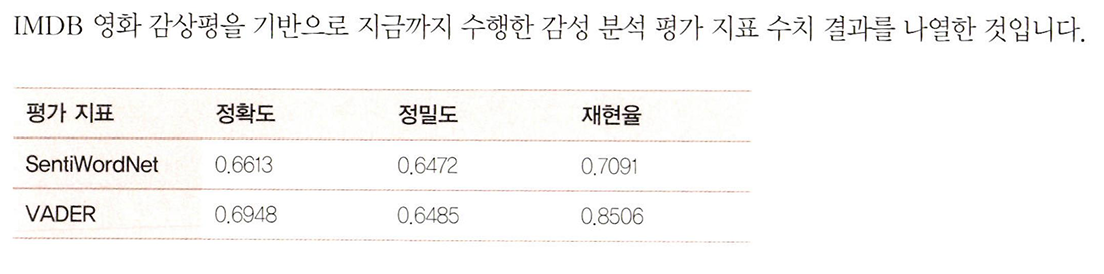